### Okay, let's finalize the visualizations and save the dataframes as csv to export to Quarto!

# Notebook 2.3: EDA III

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output

In [46]:
GENE_VALS = pd.read_csv('mgphot_gene_values.tsv', 
                 sep='\t',                  
                 on_bad_lines='skip')

GENE_NAMES = pd.read_csv('mgphot_genes.tsv',
                        sep='\t',
                        on_bad_lines='skip')

HOT100 = pd.read_csv('hot100_charts.tsv',
                        sep='\t',
                        on_bad_lines='skip')

In [47]:
import ast

GENE_VALS['gene_values'] = GENE_VALS['gene_values'].apply(lambda x: ast.literal_eval("".join(x)))
#using ast to turn this fix the list (before it was like ['[','0','.','4',',',' '])


## Visualization 1

In [48]:
INSTRUMENTS = GENE_VALS['gene_values'].apply(lambda x: x[19:35]).apply(pd.Series)
INSTRUMENTS.columns = GENE_NAMES['name'].iloc[19:35].tolist()
INSTRUMENTS.index = GENE_VALS['mgphot_track_id'].values
INSTRUMENTS.index.name = 'mgphot_track_id'
INSTRUMENTS['Year'] = GENE_VALS['year'].values
INSTRUMENTS.head()

,Drum Set,Drum Aggressiveness,Synthetic Drums,Percussion,Electric Guitar,Electric Guitar Distortion,Acoustic Guitar,String Ensemble,Horn Ensemble,Piano,Organ,Rhodes,Synthesizer,Synth Timbre,Bass Guitar,Reed Instrument,Year
mgphot_track_id,,,,,,,,,,,,,,,,,
1,0.4,0.2,0.0,0.0,0.0,0.0,0.6,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,1958
2,0.6,0.5,0.0,0.0,0.6,0.3,0.0,0.0,0.7,0.6,0.0,0.0,0.0,0.0,0.6,0.5,1958
3,0.5,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.6,0.6,1958
4,0.6,0.4,0.0,0.2,0.6,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.4,0.4,1958
5,0.6,0.6,0.0,0.0,0.5,0.2,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.5,1958


In [49]:
#re-organizing the data
guitars_melted = pd.melt(INSTRUMENTS, 
                    id_vars=['Year'], 
                    value_vars=['Electric Guitar', 'Electric Guitar Distortion', 'Acoustic Guitar', 'Bass Guitar'],
                    var_name = 'Guitar Type',
                    value_name = 'Degree of Dominance')

percussion_melted = pd.melt(INSTRUMENTS, 
                    id_vars=['Year'], 
                    value_vars=['Drum Set', 'Drum Aggressiveness', 'Synthetic Drums', 'Percussion'],
                    var_name = 'Percussion Type',
                    value_name = 'Degree of Dominance')

instruments_melted = pd.melt(INSTRUMENTS, 
                    id_vars=['Year'], 
                    value_vars=['String Ensemble', 'Horn Ensemble', 'Piano', 'Organ', 'Rhodes', 'Synthesizer', 'Synth Timbre', 'Reed Instrument'],
                    var_name = 'Other Instruments',
                    value_name = 'Degree of Dominance')

fig, axes = plt.subplots(3, 1, figsize=(8, 11), sharex=True)

events = {
    1964: "British Invasion",
    1981: "MTV Launch",
    1991: "Grunge Rise",
    1995: "EDM Mainstream",
    2010: "Streaming Era Peak"
}

#first plot
sns.lineplot(ax=axes[0], 
             data=guitars_melted, 
             x='Year', 
             y='Degree of Dominance', 
             palette='YlOrRd',
             hue='Guitar Type', 
             style='Guitar Type', 
             ci=None)
axes[0].set_title('Guitars')
axes[0].legend(bbox_to_anchor = [1.0, 1.0])
for year in events:
    axes[0].axvline(x=year, color='gray', linestyle='--', linewidth=1)

#second plot
sns.lineplot(ax=axes[1], 
             data=percussion_melted, 
             x='Year', 
             y='Degree of Dominance',
              palette='BuPu',
             hue='Percussion Type', 
             style='Percussion Type', 
             ci=None)
axes[1].set_title('Percussion')
axes[1].legend(bbox_to_anchor = [1.0, 1.0])
for year, label in events.items():
    axes[1].axvline(x=year, color='gray', linestyle='--', linewidth=1)
    axes[1].annotate(
        label,
        xy=(year, axes[1].get_ylim()[0] + (axes[1].get_ylim()[1] * 0.05)),  
        xytext=(-7, 0),
        textcoords='offset points',
        rotation=90,
        ha='center',
        va='bottom',
        fontsize=9
    )

#third plot
sns.lineplot(ax=axes[2], 
             data=instruments_melted, 
             x='Year', y='Degree of Dominance',
             hue='Other Instruments', 
             palette='Paired',
             style='Other Instruments', 
             ci=None)
axes[2].set_title('Other Instruments')
axes[2].legend(bbox_to_anchor = [1.0, 1.0])
for year in events:
    axes[2].axvline(x=year, color='gray', linestyle='--', linewidth=1)

fig.suptitle('Degree of Dominance per Instrument from 1958-2022', fontsize=16, x=0.45)
plt.tight_layout()

plt.savefig("my_plot1.png", dpi=300)
plt.close()

/tmp/ipykernel_3911/397190413.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(ax=axes[0],
/tmp/ipykernel_3911/397190413.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(ax=axes[1],
/tmp/ipykernel_3911/397190413.py:69: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(ax=axes[2],


## Visualization 2

In [6]:
HOT100['last_week_position'] = HOT100['last_week_position'].astype('Int64') 
#I want to keep that NaN values for now b/c the charts didnt track previous week yet, so it wouldn't be 0
HOT100['chart_week'] = pd.to_datetime(HOT100['chart_week'], format='%Y-%m-%d')

In [7]:
#User text inputs
#Default to all I want for christmas is you b/c its a cool anomaly 
song_input = widgets.Text(value='All I Want for Christmas', description='Song:')  
artist_input = widgets.Text(value='Mariah Carey', description='Artist:')

#Making a run button
run_button = widgets.Button(description='Run Plot', button_style='info') #ooo I like the color of info

output = widgets.Output()

# Function to plot when button is clicked
def on_button_click(b):
    with output:
        clear_output(wait=True)  # Clear previous plot or messages
        
        title = song_input.value.strip()
        artist = artist_input.value.strip()
        
        if not title or not artist:
            print("Please enter both a song title and an artist.")
            return
        
        #back to the original code
        SONG = HOT100[
            HOT100['title'].str.contains(title, case=False, na=False) &
            HOT100['artist'].str.contains(artist, case=False, na=False)
        ]
        
        if SONG.empty:
            print(f'No song found with title "{title}" and artist "{artist}".')
            return
        
        
        SONG['diff'] = SONG['chart_week'].diff().dt.days
        SONG['segment'] = (SONG['diff'] != 7).cumsum()
        SONG['billboard_year'] = SONG['chart_week'].dt.year

        
        fig, ax = plt.subplots(figsize=(12, 6))
        for (year, segment), group in SONG.groupby(['billboard_year', 'segment']):
            ax.plot(group['chart_week'],
                    group['current_week_position'],
                    marker='o',
                    label=str(year) if segment == group['segment'].iloc[0] else "")
        
        ax.invert_yaxis()
        ax.set_title(f'Weekly ranking of "{SONG["title"].iloc[0]}" by {SONG["artist"].iloc[0]}', size=16)
        ax.set_xlabel('Date')
        ax.set_ylabel('Billboard Rank (Hot 100)')
        ax.legend(title='Year', bbox_to_anchor=[1.12, 1.03])
        ax.grid(True)
        plt.show()

#Connecting the button to the click
run_button.on_click(on_button_click)

display(widgets.VBox([song_input, artist_input, run_button, output]))

## Visualization 3

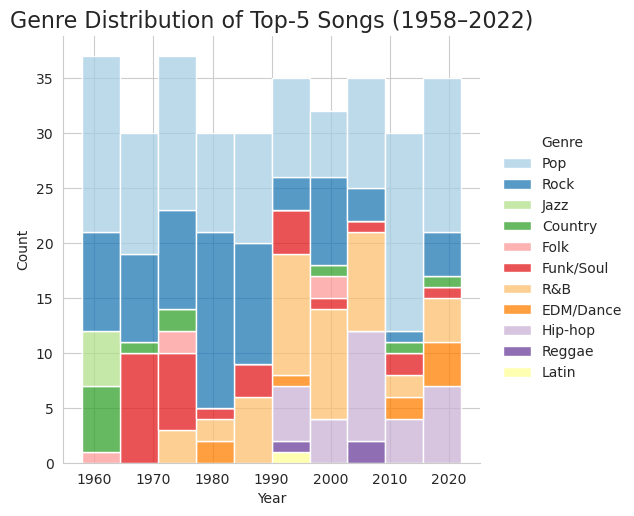

In [50]:
TOP_5 = pd.read_csv('bimmuda_genre.csv')
GENRE = TOP_5[['Title','Artist','Year','Position']].copy()
GENRE['Genre'] = TOP_5['Genre (Broad 2)']  #start with most specific
GENRE['Genre'] = GENRE['Genre'].fillna(TOP_5['Genre (Broad 1)'])
GENRE = GENRE[(GENRE['Year'] >= 1958) & (GENRE['Year'] <= 2022)]

GENRE['Genre'].unique()  #two that say Rock, let's fix that!
GENRE.loc[GENRE['Genre'].str.contains('Rock', na=False), 'Genre'] = 'Rock'

sns.displot(data=GENRE, x="Year", hue="Genre", multiple="stack", palette='Paired')
plt.title("Genre Distribution of Top-5 Songs (1958–2022)", size=16)
plt.savefig("my_plot3.png", dpi=300)

## Visualization 4

In [9]:
SONGS_FULL = pd.read_csv('SONGS_FULL.csv')
SONGS_FULL = SONGS_FULL.set_index(['Title','Artist','Position','ID'])

SONGS_MELTED = pd.melt(SONGS_FULL, id_vars=['Year'], value_vars=['Tonality', 'MIC','RIC','Unique Word Ratio'],
                    var_name='Harmonic Type', value_name='Value')

yearly_avg = SONGS_MELTED.groupby(['Year', 'Harmonic Type'])['Value'].mean().reset_index()
g = SONGS_FULL.corr()

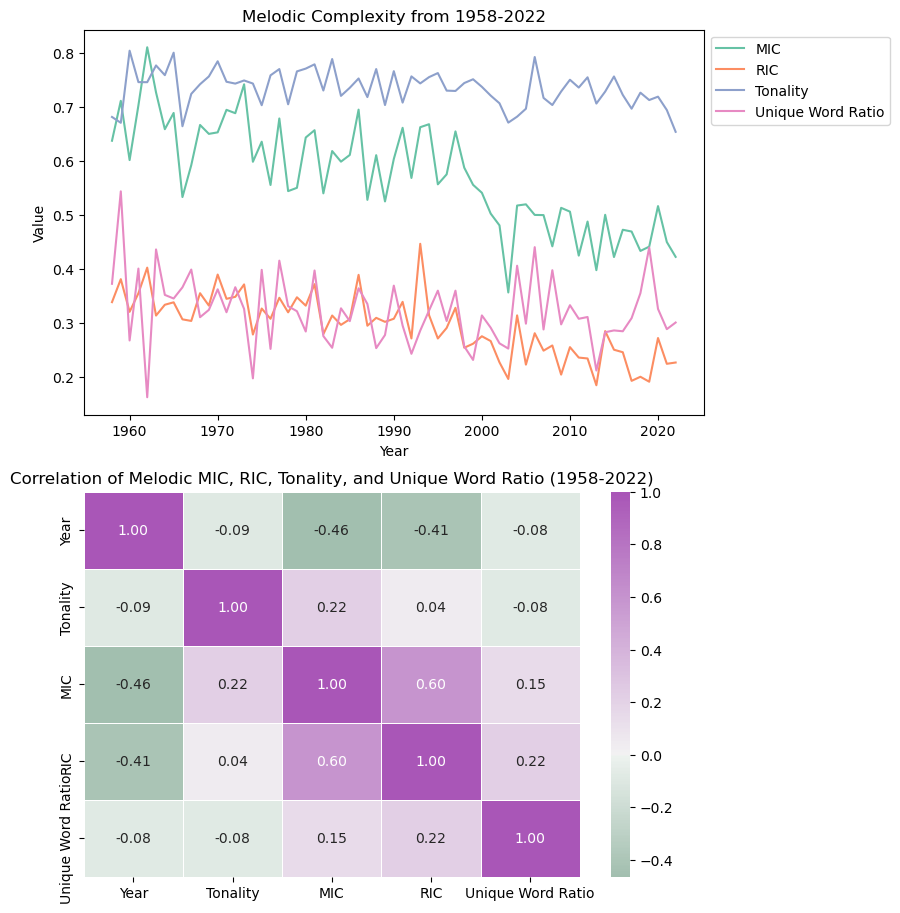

In [10]:
fig, axes = plt.subplots(2, 1, figsize=(8, 11))
custom_cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)

#the lineplot
sns.lineplot(ax=axes[0],
             data=yearly_avg, 
             x='Year', 
             y='Value', 
             palette='Set2',
             hue='Harmonic Type')
axes[0].set_title('Melodic Complexity from 1958-2022')
axes[0].legend(bbox_to_anchor = [1.0, 1.0])

#heatmap
sns.heatmap(ax=axes[1],
            data=g, 
            cmap=custom_cmap, 
            annot=True, 
            fmt='.2f', 
            linewidths=0.5, 
            center=0.0)
axes[1].set_title("Correlation of Melodic MIC, RIC, Tonality, and Unique Word Ratio (1958-2022)")
axes[0].legend(bbox_to_anchor = [1.0, 1.0])

plt.savefig("my4_plot.png", dpi=300)
plt.show()

## Visualization 5 and Visualization 5 (Updated)

In [16]:
PRODUCTION = GENE_VALS['gene_values'].apply(lambda x: x[43:49]).apply(pd.Series)
PRODUCTION.columns = GENE_NAMES['name'].iloc[43:49].tolist()
PRODUCTION.index = GENE_VALS['mgphot_track_id'].values
PRODUCTION.index.name = 'mgphot_track_id'
PRODUCTION['Year'] = GENE_VALS['year'].values
    
production_melted = pd.melt(PRODUCTION, 
                    id_vars=['Year'], 
                    value_vars=['Audio Production','Synthetic Sonority','Live Recording','Acoustic Sonority','Electric Sonority'],
                    var_name = 'Sonority',
                    value_name = 'Degree of Dominance')

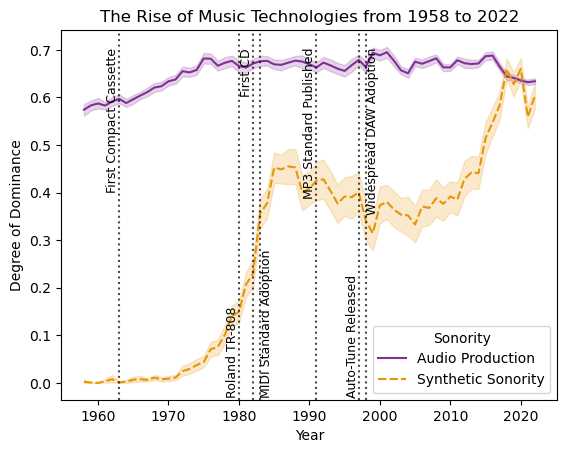

In [12]:
sns.lineplot(data=production_melted, 
             x='Year', 
             y='Degree of Dominance', 
             hue='Sonority', 
             style='Sonority',
            palette='CMRmap')

events = {
    1963: "First Compact Cassette",
    1980: "Roland TR-808",
    1982: "First CD",
    1983: "MIDI Standard Adoption",
    1991: "MP3 Standard Published",
    1997: "Auto-Tune Released",
    1998: "Widespread DAW Adoption"
}

top = True
for i, (year, label) in enumerate(sorted(events.items()), 1):
    plt.axvline(x=year, color='black', linestyle=':', alpha=0.7)
    
    #alternate top/bottom bc the lines are too close
    if top:
        y = plt.ylim()[1]*0.95  
        va = 'top'
    else:
        y = plt.ylim()[0]*0.89  
        va = 'bottom'
    
    #flip horizontal alignment for 4th and 7th lines to make it less cluttered
    if i in [4, 7]: 
        ha = 'left'  
    else:
        ha = 'right'  
    
    plt.text(
        x=year,
        y=y,
        s=label,
        rotation=90,
        verticalalignment=va,
        horizontalalignment=ha,
        fontsize=9,
        color='black'
    )
    top = not top
    
plt.title("The Rise of Music Technologies from 1958 to 2022")

plt.savefig("my_plot.png", dpi=300)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'figsize'

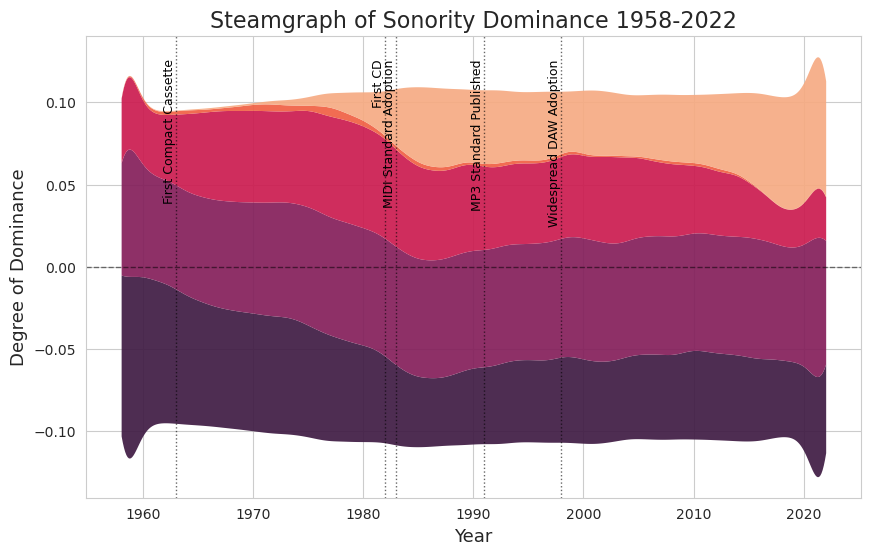

In [54]:
from scipy import stats      #used an outside source to help make this--is in the manifest for resources


df_wide = production_melted.pivot_table(
    index='Year',
    columns='Sonority',
    values='Degree of Dominance',
    aggfunc='mean'
).sort_index()

x = df_wide.index.values
y = df_wide.values.T
labels = df_wide.columns

#Guassian smoothing (will source)
def gaussian_smooth(x, y, grid, sd):
    weights = np.transpose([stats.norm.pdf(grid, m, sd) for m in x])
    weights = weights / weights.sum(0)
    return (weights * y).sum(1)

grid = np.linspace(x.min(), x.max(), 600)
y_smoothed = [gaussian_smooth(x, yi, grid, sd=1.0) for yi in y]

colors = sns.color_palette("rocket", n_colors=len(labels))

fig, ax = plt.subplots(figsize=(10, 6))

ax.stackplot(
    grid,
    y_smoothed,
    baseline="sym",
    labels=labels,
    colors=colors,      
    alpha=0.92,
    linewidth=0
)

ax.axhline(0, color="black", lw=1, ls="--", alpha=0.5)

events = {
    1963: "First Compact Cassette",
    1982: "First CD",
    1983: "MIDI Standard Adoption",
    1991: "MP3 Standard Published",
    1998: "Widespread DAW Adoption"
}

ymax = ax.get_ylim()[1]

for year, label in events.items():
    ax.axvline(year, color="black", ls=":", lw=1, alpha=0.6)
    ax.text(
        year,
        ymax * 0.90,
        label,
        rotation=90,
        ha="right",
        va="top",
        fontsize=9,
        color="black"
    )


plt.title("Steamgraph of Sonority Dominance 1958-2022", fontsize=16)

plt.xlabel("Year", fontsize=13)
plt.ylabel("Degree of Dominance", fontsize=13)

plt.figsize(8,10)
plt.legend(loc='upper right', frameon=True)
plt.tight_layout()
plt.savefig("my_plot5.png", dpi=300)
plt.show()


# Visualization 4 (updated)

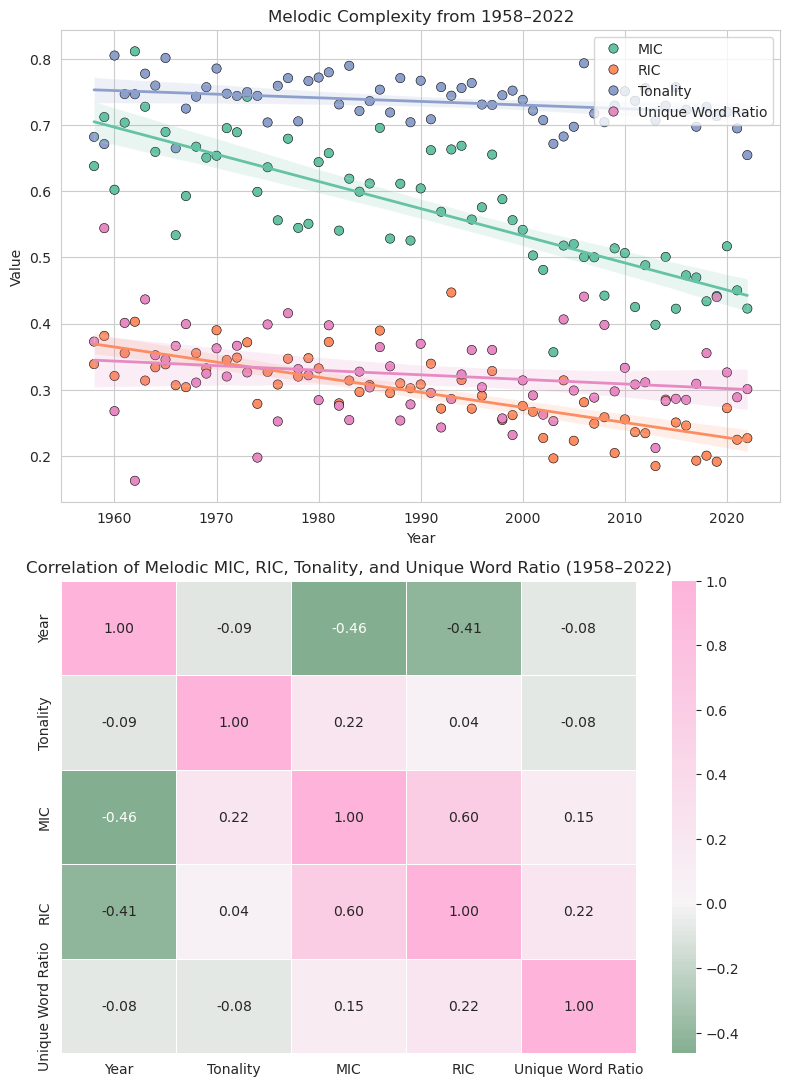

In [53]:
fig, axes = plt.subplots(2, 1, figsize=(8, 11))

from matplotlib.colors import LinearSegmentedColormap

wicked_colors = ["#005E1C", "#F7F4F6", "#FDB3DA"]  # Elphaba -> neutral -> Glinda
custom_cmap = LinearSegmentedColormap.from_list("wicked", wicked_colors)

#now a scatter plot with regeression line
palette = sns.color_palette("Set2", n_colors=yearly_avg['Harmonic Type'].nunique())
harmonic_types = yearly_avg['Harmonic Type'].unique()

#scatterplot :)
sns.scatterplot(
    ax=axes[0],
    data=yearly_avg,
    x='Year',
    y='Value',
    hue='Harmonic Type',
    palette=palette,
    s=45,
    edgecolor='black',
    linewidth=0.4
)

#regression lines loop over each category so they match the scatter hue
for harm_type, color in zip(harmonic_types, palette):
    subset = yearly_avg[yearly_avg['Harmonic Type'] == harm_type]
    sns.regplot(
        ax=axes[0],
        data=subset,
        x='Year',
        y='Value',
        scatter=False,
        color=color,
        line_kws={'linewidth': 2}
    )

axes[0].set_title('Melodic Complexity from 1958–2022')
axes[0].legend(loc='upper right', frameon=True)

#heatmap
sns.heatmap(
    ax=axes[1],
    data=g,
    cmap=custom_cmap,
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    center=0.0
)

axes[1].set_title(
    "Correlation of Melodic MIC, RIC, Tonality, and Unique Word Ratio (1958–2022)"
)

plt.tight_layout()
plt.savefig("my4_plot.png", dpi=300)
plt.show()
